In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

Load the Boston House Prices dataset from sklearn. 

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

Sometimes it is convenient to use a DataFrame in pandas.

In [3]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['price'] = boston.target
print(df.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.593761   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.596783   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.647423   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

From DataFrame.describe(), we can see the basic statistics of the dataset. In order to look into the importance of features, we look at the correlation matrix, whose last column gives the desired correlations with price.

In [5]:
pearson = df.corr() #default method='pearson'
corr_with_target = pearson.iloc[-1]
predicitivity = corr_with_target.sort_values(ascending=False)
print(predicitivity)

price      1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.385832
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: price, dtype: float64


If we ingore the signs, we get the absolute version of correlations. 

In [7]:
abs_corr = np.abs(corr_with_target)
abs_corr_sorted = abs_corr.sort_values(ascending=False)
print(abs_corr_sorted)

price      1.000000
LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
CRIM       0.385832
RAD        0.381626
AGE        0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
Name: price, dtype: float64


So we can see some features are more important than others. Up to now, we got a rough idea about the dataset. Next, we will try to clean the data a little and make it nicer. 

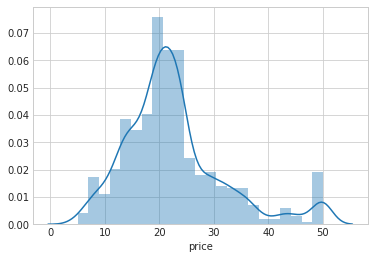

In [8]:
sns.distplot(df.price)

On the right hand side of the plot of prices, there are some irregular values, let us cut the fat tail by deleting all the points with price=50.

In [9]:
df = df[df.price < 50]

We choose some important features and play with a jointplot to double check the correlation.

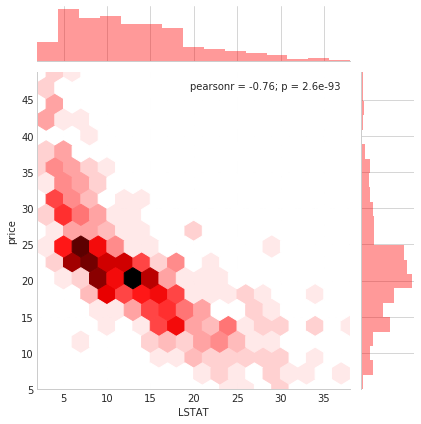

In [10]:
sns.jointplot(df['LSTAT'], df['price'], kind='hex', color='r')

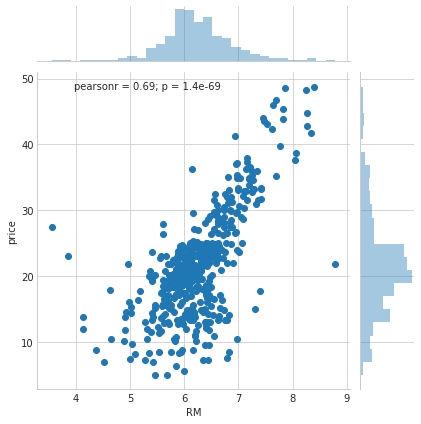

In [11]:
sns.jointplot(df['RM'], df['price'], kind='scatter')

From the above jointplot between RM and price, there are some outliers with irregular values. For example, there is one point with high RM but low price, there are two points with low RM but relatively high prices. Let us delete these three points. 

In [12]:
RM_argmax = np.argmax(df.RM)
df.drop([RM_argmax], inplace=True)

for i in range(2):
    RM_argmin = np.argmin(df.RM)
    df.drop([RM_argmin], inplace=True)

Okay, we are done with data cleaning. Let us look at the corrplot of features, here we take only half of the features and use a heatmap.

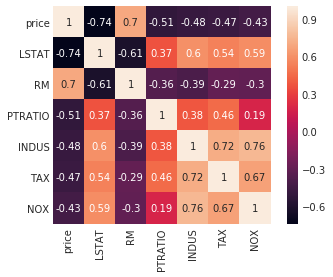

In [14]:
top_features = ['price', 'LSTAT', 'RM', 'PTRATIO', 'INDUS', 'TAX', 'NOX']
half_pearson = pearson.loc[top_features, top_features]
sns.heatmap(half_pearson, square=True, annot=True)

Let us apply some machine learning algorithms to the raw data, and later to the cleaned data

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=0)

We directly use random forest.

In [16]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()
forest.fit(X_train, y_train)
print('score of training set (raw data) by Random Forest regression: {}'.format(forest.score(X_train, y_train)))
print('score of test set (raw data) by Random Forest regression:     {}'.format(forest.score(X_test, y_test)))

score of training set (raw data) by Random Forest regression: 0.9728535397753897
score of test set (raw data) by Random Forest regression:     0.7569621247985407


It is possible that Gradient Boosted Regression Tree would give a slightly better result. 

In [17]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
print('score of training set (raw data) by Gradient Boosting regression: {}'.format(gbr.score(X_train, y_train)))
print('score of test set (raw data) by Gradient Boosting regression:     {}'.format(gbr.score(X_test, y_test)))

score of training set (raw data) by Gradient Boosting regression: 0.9831659127627392
score of test set (raw data) by Gradient Boosting regression:     0.8191213635364493


We can see the difference between Random Forest and Gradient Boosting by plotting the feature_importance.

([<matplotlib.axis.XTick at 0x7f3224efae48>,
 <a list of 13 Text xticklabel objects>)

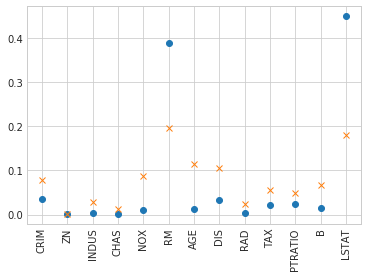

In [19]:
plt.plot(forest.feature_importances_, 'o')
plt.plot(gbr.feature_importances_, 'x')
plt.xticks(range(boston.data.shape[1]), boston.feature_names, rotation=90)

Just for fun, let us give a 3D plot using the two most important features.

Text(0.5,0,'price')

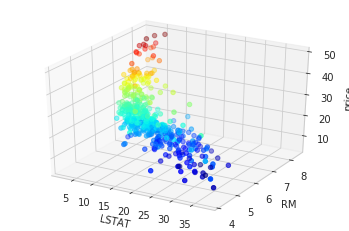

In [21]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['LSTAT'], df['RM'], df['price'], c=df.price, marker='o', cmap='jet')
ax.set_xlabel('LSTAT')
ax.set_ylabel('RM')
ax.set_zlabel('price')

Now let us apply the same algorithms to the cleaned data, the accuracy score increases a little. 

In [22]:
X = df.loc[:, boston.feature_names]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [23]:
forest = RandomForestRegressor()
forest.fit(X_train, y_train)
print('score of training set (cleaned data) by Random Forest regression: {}'.format(forest.score(X_train, y_train)))
print('score of test set (cleaned data) by Random Forest regression:     {}'.format(forest.score(X_test, y_test)))

score of training set (cleaned data) by Random Forest regression: 0.9781306087875306
score of test set (cleaned data) by Random Forest regression:     0.8636677499210512


In [24]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
print('score of training set (cleaned data) by Gradient Boosting regression: {}'.format(gbr.score(X_train, y_train)))
print('score of test set (cleaned data) by Gradient Boosting regression:     {}'.format(gbr.score(X_test, y_test)))

score of training set (cleaned data) by Gradient Boosting regression: 0.975683736660027
score of test set (cleaned data) by Gradient Boosting regression:     0.8931535070181931


Finally, let us tune the parameters of Gradient Boosting using GridSearchCV, and see if we can get a better result.

In [25]:
from sklearn.model_selection import GridSearchCV

params = {'max_depth': [1, 2, 3, 4, 5], 'learning_rate': [1, 0.5, 0.1, 0.05, 0.01]}

grid = GridSearchCV(estimator=GradientBoostingRegressor(), param_grid=params, cv=5)
grid = grid.fit(X, y)
print(grid.best_params_)

{'learning_rate': 0.1, 'max_depth': 2}


Now we use the best parameters to build a best estimator.

In [27]:
best_gbr = GradientBoostingRegressor(max_depth=grid.best_params_['max_depth'], 
                                     learning_rate=grid.best_params_['learning_rate'])
best_gbr.fit(X_train, y_train)
print('score of training set (cleaned data) by Gradient Boosting regression after tuning parameters: {}' \
      .format(best_gbr.score(X_train, y_train)))
print('score of test set (cleaned data) by Gradient Boosting regression after tuning parameters:     {}' \
      .format(best_gbr.score(X_test, y_test)))

score of training set (cleaned data) by Gradient Boosting regression after tuning parameters: 0.9448692110941583
score of test set (cleaned data) by Gradient Boosting regression after tuning parameters:     0.8700066102097531


It turns out that we cannot get a better prediction based on the best parameters... Anyway, we give a plot comparing the true price and the predicted price.

Text(0,0.5,'Predictions')

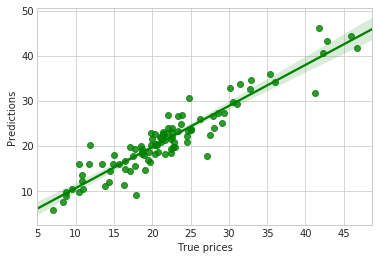

In [29]:
y_pred = best_gbr.predict(X_test)
ax = sns.regplot(y_test, y_pred, color='g')
ax.set_xlabel('True prices')
ax.set_ylabel('Predictions')